In [14]:
# Importing lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [13]:
import kagglehub
import os
import pandas as pd

# downloading dataset
path = kagglehub.dataset_download("zeesolver/dark-web")

# print all files in directory
files = os.listdir(path)
print("Files in the dataset directory:", files)

# grab the csv file, you can just add the path tbh it doesnt matter
csv_file = None
for file in files:
    if file.endswith(".csv"):
        csv_file = os.path.join(path, file)
        break

if not csv_file:
    raise FileNotFoundError("No CSV file found in the dataset directory!")

print("CSV file located at:", csv_file)


df = pd.read_csv(csv_file)

# Preview the dataset
print("Dataset loaded successfully!")
#print(df.head())


Files in the dataset directory: ['Time-Wasters on Social Media.csv']
CSV file located at: /root/.cache/kagglehub/datasets/zeesolver/dark-web/versions/1/Time-Wasters on Social Media.csv
Dataset loaded successfully!


In [15]:
#CLEANING DATA
# Check for missing values in ds
print("\nChecking for missing values:")
print(df.isnull().sum())

# droppin missing values
# Strategy: Filling  numerical columns with the median and categorical with the mode
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        df[column].fillna(df[column].median(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

# making sure no missed values
print("\nMissing values after cleaning:")
print(df.isnull().sum())



Checking for missing values:
UserID                      0
Age                         0
Gender                      0
Location                    0
Income                      0
Debt                        0
Owns Property               0
Profession                  0
Demographics                0
Platform                    0
Total Time Spent            0
Number of Sessions          0
Video ID                    0
Video Category              0
Video Length                0
Engagement                  0
Importance Score            0
Time Spent On Video         0
Number of Videos Watched    0
Scroll Rate                 0
Frequency                   0
ProductivityLoss            0
Satisfaction                0
Watch Reason                0
DeviceType                  0
OS                          0
Watch Time                  0
Self Control                0
Addiction Level             0
CurrentActivity             0
ConnectionType              0
dtype: int64

Missing values after clean

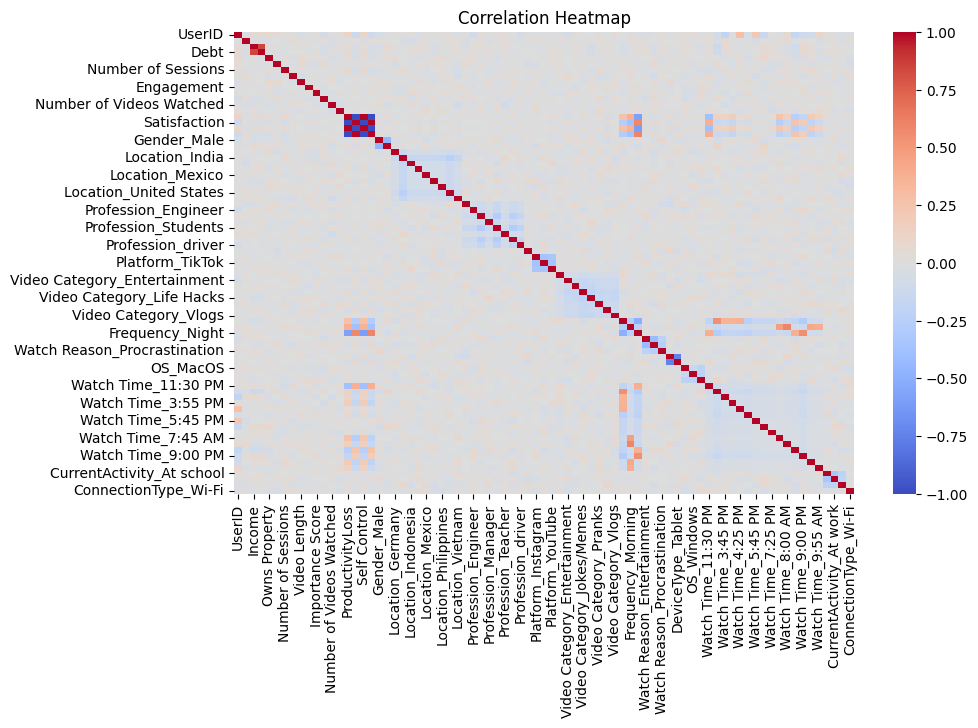

In [53]:
# using one-hot encoding -> Converting categorical data to numerical
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display dataset info
#print("\nDataset Info After Encoding:")
#print(df_encoded.info())

# Correlation heatmap , i know we already have one just printing it here for now to see some stuff
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [42]:
# Printing  all column names
print("Column names in the dataset:")
#print(df_encoded.columns)

# Define features and target, we can add more if needed this is the ones i added to check with productivity loss
# Ensure the column name matches exactly as in the dataset, i had problems with adding space between the names lol
features = ['age', 'scroll_rate', 'engagement', 'addiction_level', 'income']
target = 'ProductivityLoss'


# 'addiction_level' as the target variable, representing a mental health-related outcome
if target not in df_encoded.columns:
    raise KeyError(f"Target column '{target}' not found in the dataset!")

# Define features by excluding the target variable
# Features are basically predictors used to explain variations in the target variable.
features = [col for col in df_encoded.columns if col != target]

# Create feature matrix (X) and target variable (y)
X = df_encoded[features]
y = df_encoded[target]

print("Updated Features shape:", X.shape)  # Ensures correct feature matrix size
print("Updated Target shape:", y.shape)    # Confirms the target is isolated

# Relevance:
# The target variable 'addiction_level' represents a measurable mental health outcome influenced by social media habits.
# Features such as age, scroll rate, and income are predictors of this outcome.


Column names in the dataset:
Updated Features shape: (1000, 78)
Updated Target shape: (1000,)


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Splitting the data into training and test sets
# 80% of the data is used for training, 20% for testing to evaluate the model's performance on unseen data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
# Goal is to find the best-fit line to predict the target variable (productivityLoss)
model = LinearRegression()
model.fit(X_train, y_train)

# This checks how well the model generalizes to unseen data
y_pred = model.predict(X_test)


In [52]:
from sklearn.metrics import mean_squared_error, r2_score

#using Mean Squared Error and R-squared metrics
mse = mean_squared_error(y_test, y_pred)  # Measures average squared difference between actual and predicted values
r2 = r2_score(y_test, y_pred)            # Indicates the proportion of variance explained by the model

# Display evaluation metrics in a styled format
print("\n\033[1mLinear Regression Model Performance:\033[0m")
print(f"\033[94mMean Squared Error (MSE): {mse:.2f}\033[0m")   # MSE
print(f"\033[92mR-squared (R²): {r2:.2f}\033[0m")              #  R²



Linear Regression Model Performance:
Mean Squared Error (MSE): 0.00
R-squared (R²): 1.00


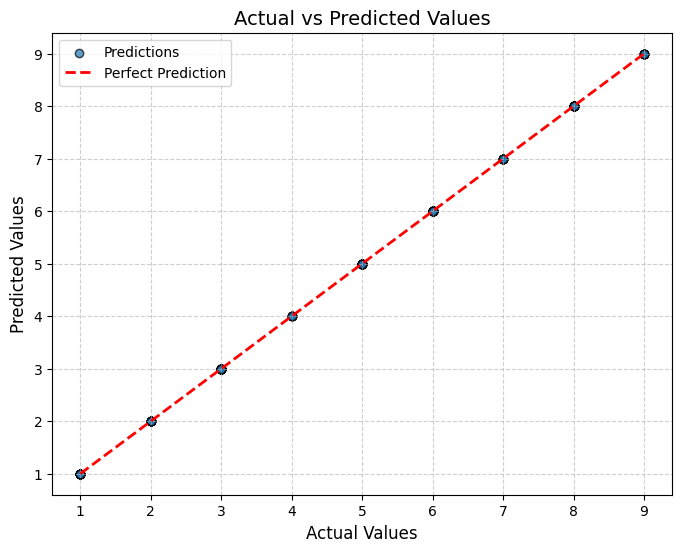

In [23]:
# Scatter plot to compare actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k', label="Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linewidth=2, linestyle="--", label="Perfect Prediction")
plt.title("Actual vs Predicted Values", fontsize=14)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Relevance:
# This visualization helps us understand how closely the model's predictions align with actual values.
# Points near the red line indicate accurate predictions.


In [28]:
# Displaying the coefficients of the Linear Regression model
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

# Printing feature coefficients
print("\n\033[1mFeature Coefficients (Linear Regression):\033[0m")
print(coefficients.to_string(index=False))  # Removes index for cleaner output

# Relevance:
# The coefficients indicate the impact of each feature on the target variable.
# Features with larger coefficients have a stronger influence.



Feature Coefficients (Linear Regression):
                     Feature   Coefficient
         Watch Time_11:30 PM  1.815106e-11
          Watch Time_9:00 PM  1.642037e-11
          Watch Time_8:30 PM  1.541176e-11
       DeviceType_Smartphone  9.862517e-12
          Watch Time_9:15 AM  9.842183e-12
          Watch Time_7:45 AM  6.869894e-12
          Watch Time_6:05 PM  6.135439e-12
          Watch Time_2:00 PM  5.232079e-12
          Profession_Cashier  5.163456e-12
               Owns Property  4.686963e-12
           Profession_driver  4.190981e-12
          Watch Time_7:25 PM  3.437702e-12
      Location_United States  3.087225e-12
          Watch Time_4:25 PM  2.883832e-12
            Platform_YouTube  2.512941e-12
        Location_Philippines  2.470801e-12
          Watch Reason_Habit  2.414485e-12
  Watch Reason_Entertainment  2.346637e-12
         Profession_Students  1.920977e-12
              Location_India  1.682432e-12
                Self Control  1.509598e-12
           

In [27]:
from sklearn.model_selection import cross_val_score

# Performing cross-validation to evaluate the model on multiple data splits
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Displaying result
print("\n\033[1mCross-Validation R² Scores:\033[0m")
print(cv_scores)
print(f"\033[94mMean R² Score: {cv_scores.mean():.2f}\033[0m")  # Blue text for mean score

# Relevance:
# Cross-validation ensures the model's performance is consistent and not dependent on a single train-test split.
# A higher mean R² indicates better predictive performance.



Cross-Validation R² Scores:
[1. 1. 1. 1. 1.]
Mean R² Score: 1.00


In [31]:
from sklearn.linear_model import Ridge
# I am adding an "experimment" with a Ridge Regression Model
# Initialize and train Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # Alpha adds regularization to reduce overfitting
ridge_model.fit(X_train, y_train)

# Make predictions
ridge_y_pred = ridge_model.predict(X_test)

# Evaluate performance
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)

# Display Ridge Regression evaluation metrics
print("\n\033[1mRidge Regression Model Performance:\033[0m")
print(f"\033[94mMean Squared Error (MSE): {ridge_mse:.2f}\033[0m")
print(f"\033[92mR-squared (R²): {ridge_r2:.2f}\033[0m")

# Relevance:
# Ridge regression handles multicollinearity by penalizing large coefficients, improving model stability.



Ridge Regression Model Performance:
Mean Squared Error (MSE): 0.00
R-squared (R²): 1.00


In [50]:
# I am going to use random forest since it  helps predict continuous outcomes like Addiction Level or Satisfaction by using non-linear relationships between features like Scroll Rate and Time Spent.
# Basically it will identify key predictors by evaluating their impact on reducing errors, uncovering patterns in social media behavior which affect mental health.
# Expanded list of selected features for Random Forest
selected_features = [
    'Satisfaction',            # Indicates user satisfaction
    'Addiction Level',         # Directly related to mental health
    'Self Control',            # Psychological
    'Scroll Rate',             # Behavioral usage
    #'Time Spent On Video',
    #'Engagement',
    #'Number of Sessions',
    #'Total Time Spent',
    #'Frequency_Night',
    #'Frequency_Evening',
    #'Watch Reason_Procrastination',
    #'Demographics_Urban',
    #'Platform_TikTok',
    #'Platform_Instagram'
]

X_selected = df_encoded[selected_features]
y = df_encoded[target]
#training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [49]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest model yusing new sets
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Extract feature importances
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_selected.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\n\033[1mFeature Importance (Random Forest):\033[0m")
print(feature_importance_df.to_string(index=False))



Feature Importance (Random Forest):
        Feature  Importance
   Satisfaction    0.412710
Addiction Level    0.312902
   Self Control    0.274389
    Scroll Rate    0.000000


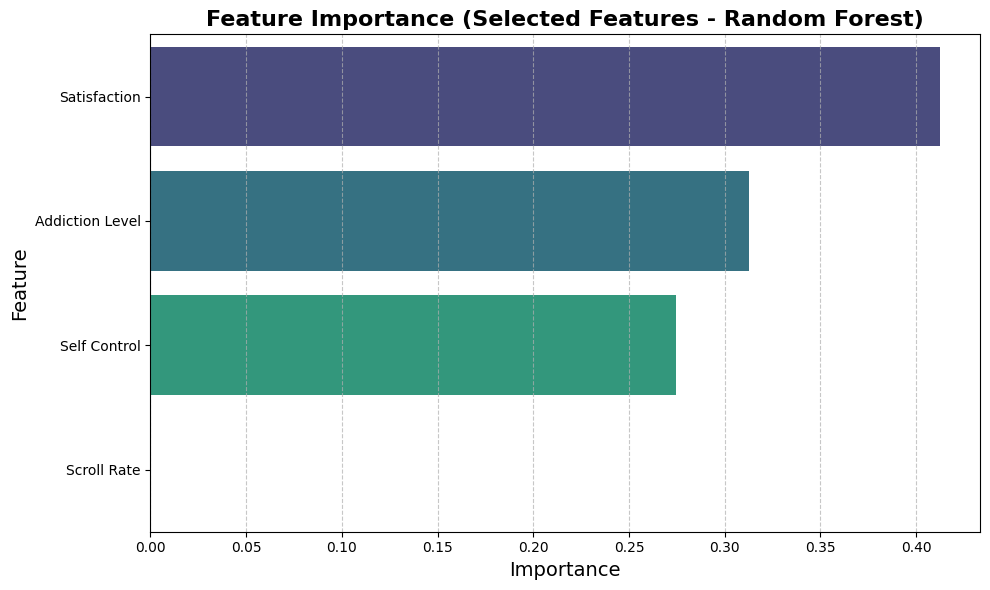

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")

# Enhance plot aesthetics
plt.title("Feature Importance (Selected Features - Random Forest)", fontsize=16, weight='bold')
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.tight_layout()  # Ensure everything fits well
plt.show()
